# Exploratory Data Analysis  - BP World Energy Outlook
## Introduction
A simple data analysis covering:
1. Data processing with Pandas
1. Plotting with Matplotlib
1. .gif generation
1. Interactive plots
1. Spatial mapping (WORK IN PROGRESS)

Import the libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import urllib

sns.set()

Download data (in Excel).

In [2]:
my_url = "https://www.bp.com/content/dam/bp/en/corporate/excel/energy-economics/statistical-review/bp-stats-review-2018-all-data.xlsx"
my_file_name = "bp-stats-review-2018-all-data.xlsx"
urllib.request.urlretrieve(my_url, my_file_name)

('bp-stats-review-2018-all-data.xlsx',
 <http.client.HTTPMessage at 0x7f549a472ef0>)

Load Oil Production as a Dataframe and view the first couple of rows

In [3]:
df = pd.read_excel(my_file_name, sheet_name='Oil Production - Barrels', skiprows=2, nrows=106,index_col=0)
df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2011,2012,2013,2014,2015,2016,2017,2017.1,2006-16,2017.2
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,9014.148,9579.241,10219.252,10599.743,10827.674,11296.849,11155.778,11184.896,10945.953,10461.205,...,7858.849000,8903.618000,10071.217000,11768.193000,12750.268000,12365.806000,13056.993000,0.055895,0.061238,0.140930
Canada,920.000,1012.000,1106.000,1194.000,1306.000,1473.000,1582.000,1829.000,2114.000,1993.000,...,3514.822066,3740.237677,4000.410965,4270.529903,4389.140224,4470.176332,4830.628451,0.080635,0.033722,0.052139
Mexico,362.000,370.000,411.000,439.000,461.000,487.000,486.000,506.000,525.000,653.000,...,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160,-0.094327,-0.039877,0.024006
Total North America,10296.148,10961.241,11736.252,12232.743,12594.674,13256.849,13223.778,13519.896,13584.953,13107.205,...,14313.984446,15554.953658,16946.380696,18822.923782,19725.949071,19291.781830,20111.771611,0.042505,0.034652,0.217076


Delete all the rows with no data and delete the last three columns

In [4]:
df = df.dropna(how='all')
df = df.drop(columns=["2017.1", "2006-16", "2017.2"])
df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
US,9014.148000,9579.24100,10219.252000,10599.74300,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,10461.205000,...,6783.958000,7263.034000,7549.188000,7858.849000,8903.618000,10071.217000,11768.193000,12750.268000,12365.806000,13056.993000
Canada,920.000000,1012.00000,1106.000000,1194.00000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,1993.000000,...,3207.035298,3202.397689,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4389.140224,4470.176332,4830.628451
Mexico,362.000000,370.00000,411.000000,439.00000,461.000000,487.000000,486.000000,506.000000,525.000000,653.000000,...,3165.327712,2978.494802,2959.366480,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160
Total North America,10296.148000,10961.24100,11736.252000,12232.74300,12594.674000,13256.849000,13223.778000,13519.896000,13584.953000,13107.205000,...,13156.321010,13443.926490,13840.634280,14313.984446,15554.953658,16946.380696,18822.923782,19725.949071,19291.781830,20111.771611
Argentina,275.673973,292.86411,318.631233,348.15847,361.532055,399.464658,431.538082,444.115847,433.635616,423.387397,...,803.923484,730.781649,713.643667,668.486371,657.968761,646.726142,639.795756,648.993431,625.664826,593.394470


Delete some of the rows that are not relevant

In [5]:
df = df.drop(df.filter(like='Total', axis=0).index)
df = df.drop(df.filter(like='OECD', axis=0).index)
df = df.drop(df.filter(like='OPEC', axis=0).index)
df = df.drop(df.filter(like='European', axis=0).index)
df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
US,9014.148000,9579.24100,10219.252000,10599.74300,10827.674000,11296.849000,11155.778000,11184.896000,10945.953000,10461.205000,...,6783.958000,7263.034000,7549.188000,7858.849000,8903.618000,10071.217000,11768.193000,12750.268000,12365.806000,13056.993000
Canada,920.000000,1012.00000,1106.000000,1194.00000,1306.000000,1473.000000,1582.000000,1829.000000,2114.000000,1993.000000,...,3207.035298,3202.397689,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4389.140224,4470.176332,4830.628451
Mexico,362.000000,370.00000,411.000000,439.00000,461.000000,487.000000,486.000000,506.000000,525.000000,653.000000,...,3165.327712,2978.494802,2959.366480,2940.313380,2911.097981,2874.752731,2784.200879,2586.540847,2455.799498,2224.150160
Argentina,275.673973,292.86411,318.631233,348.15847,361.532055,399.464658,431.538082,444.115847,433.635616,423.387397,...,803.923484,730.781649,713.643667,668.486371,657.968761,646.726142,639.795756,648.993431,625.664826,593.394470
Brazil,96.000000,117.00000,147.000000,161.00000,176.000000,166.681031,174.845001,171.186291,173.986204,181.762240,...,1897.158904,2029.027560,2136.881737,2178.757447,2144.846965,2109.938141,2341.371973,2524.987068,2607.791528,2733.987098


Store all the country names in a list.

In [6]:
countries = list(df.index)
countries = [x for x in countries if 'Other' not in x]
countries = [x for x in countries if 'Total' not in x]
print(countries)

['US', 'Canada', 'Mexico', 'Argentina', 'Brazil', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago', 'Venezuela', 'Denmark', 'Italy', 'Norway', 'Romania', 'United Kingdom', 'Azerbaijan', 'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR', 'Uzbekistan', 'Iran', 'Iraq', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Algeria', 'Angola', 'Chad', 'Republic of Congo ', 'Egypt', 'Equatorial Guinea', 'Gabon', 'Libya', 'Nigeria', 'South Sudan', 'Sudan', 'Tunisia', 'Australia', 'Brunei', 'China', 'India', 'Indonesia', 'Malaysia', 'Thailand', 'Vietnam']


View oil production in Malaysia

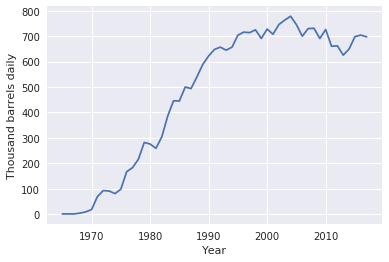

In [7]:
plt.plot(df.loc['Malaysia'])
plt.xlabel('Year'), plt.ylabel('Thousand barrels daily')
plt.show()

Sort the countries according to oil production in 2017

In [8]:
df = df.sort_values(by=[2017], ascending=False)
df.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
US,9014.148,9579.241,10219.252,10599.743,10827.674,11296.849000,11155.778000,11184.896000,10945.95300,10461.20500,...,6783.958000,7263.034000,7549.188000,7858.849000,8903.618000,10071.217000,11768.193000,12750.268000,12365.806000,13056.993000
Saudi Arabia,2219.000,2615.000,2825.000,3081.000,3262.000,3851.000000,4821.000000,6070.000000,7693.00000,8618.00000,...,10662.734303,9663.341463,10074.569223,11143.745770,11634.543638,11393.076841,11504.745770,11994.311801,12401.763995,11950.842570
Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9969.253681,10157.218262,10382.658235,10538.208819,10660.076573,10808.925031,10860.461782,11009.215690,11269.384229,11257.263379
Iran,1908.000,2132.000,2603.000,2840.000,3376.000,3847.659726,4572.421918,5058.957377,5907.37589,6060.30137,...,4420.591361,4291.795685,4430.120822,4472.482110,3820.303847,3617.012260,3723.567562,3861.807200,4602.351414,4981.678749
Canada,920.000,1012.000,1106.000,1194.000,1306.000,1473.000000,1582.000000,1829.000000,2114.00000,1993.00000,...,3207.035298,3202.397689,3332.079800,3514.822066,3740.237677,4000.410965,4270.529903,4389.140224,4470.176332,4830.628451


Plot the oil production for the top 5 countries

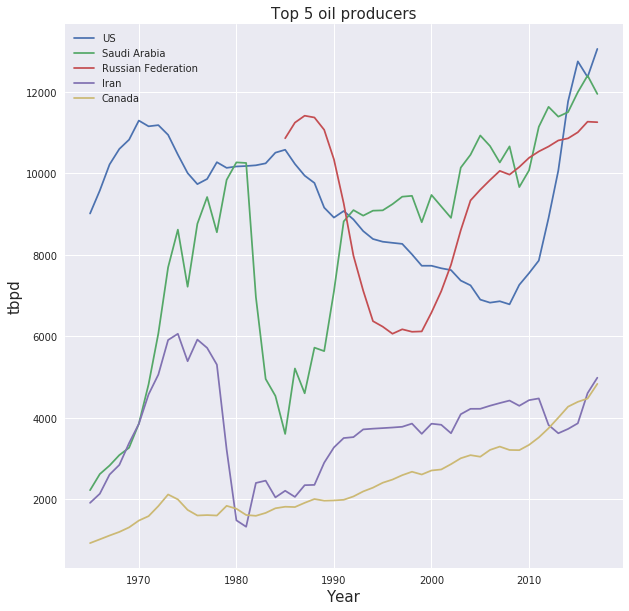

In [9]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.plot(df.iloc[i])
    
plt.legend(loc='upper left',frameon=False)
plt.xlabel('Year', fontsize=15), plt.ylabel('tbpd', fontsize=15)
plt.title('Top 5 oil producers', fontsize=15)
plt.savefig('top_producers.jpg')

Define the workflow from above in a single function, and use that function to import Oil Consumption data.

In [10]:
def export_oil(my_sheet):
    df = pd.read_excel(my_file_name, sheet_name=my_sheet, skiprows=2, nrows=106,index_col=0)
    df = df.dropna(how='all')
    df = df.drop(columns=["2017.1", "2006-16", "2017.2"])

    df = df.drop(df.filter(like='Total', axis=0).index)
    df = df.drop(df.filter(like='OECD', axis=0).index)
    df = df.drop(df.filter(like='OPEC', axis=0).index)
    df = df.drop(df.filter(like='European', axis=0).index)
    
    return df

df_consume = export_oil(my_sheet='Oil Consumption - Barrels')
df_consume.head()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Thousand barrels daily,,,,,,,,,,,,,,,,,,,,,
US,11522.187698,12100.347314,12566.880466,13404.548552,14152.985096,14709.910246,15222.758083,16380.813852,17317.932767,16630.648000,...,19490.413732,18771.397260,19180.128767,18882.073973,18490.215847,18961.126027,19105.613699,19530.909589,19687.232240,19879.852157
Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1682.379178,1712.654082,...,2297.391732,2174.200414,2306.324712,2381.475974,2341.919828,2383.474962,2399.457052,2348.032834,2400.636381,2428.305666
Mexico,315.871088,333.048484,357.305957,386.144762,410.021906,440.735987,467.284852,523.353166,564.177805,629.457069,...,2080.436643,2021.321154,2039.738801,2065.143677,2082.999487,2034.163494,1959.694886,1939.288594,1977.187348,1910.409557
Argentina,432.373936,447.270806,459.876977,468.994810,491.750733,447.785768,479.603260,478.584153,482.634685,482.874384,...,540.092111,532.222891,593.686424,608.779290,635.630733,682.954995,673.055229,695.784510,687.262585,670.475168
Brazil,305.673808,334.602575,344.540164,412.432377,456.564904,515.878427,568.841234,655.577216,802.757463,862.908746,...,2481.275520,2497.932512,2716.314058,2838.675859,2915.066716,3124.283752,3242.347094,3181.116091,3012.658115,3016.600981


We now identify only countries that are listed in both Oil Production and Oil Consumed data

In [11]:
valid_keys = [key for key in countries if key in df_consume.index.values]
df_consume.loc[valid_keys].sort_index()[2017]

Thousand barrels daily
Algeria                   411.155096
Argentina                 670.475168
Australia                1078.767410
Azerbaijan                 92.123837
Brazil                   3016.600981
Canada                   2428.305666
China                   12798.571418
Colombia                  344.206308
Denmark                   164.552478
Ecuador                   237.150622
Egypt                     815.653755
India                    4690.282202
Indonesia                1651.668272
Iran                     1815.581570
Iraq                      791.112172
Italy                    1247.082687
Kazakhstan                310.558243
Kuwait                    449.420032
Malaysia                  802.947876
Mexico                   1910.409557
Norway                    223.265527
Oman                      188.817772
Peru                      258.629363
Qatar                     353.615670
Romania                   203.450448
Russian Federation       3223.939593
Saudi Arabia   

Seems like bad data for USSR so delete it.

In [12]:
valid_keys.pop(19) # delete USSR

'USSR'

We now plot bot Oil Production and Consumption in Malaysia.

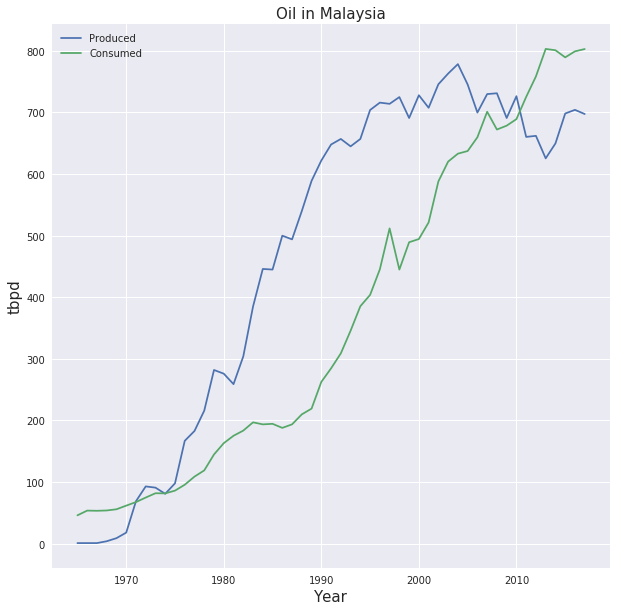

In [13]:
plt.figure(figsize=(10,10))
plt.plot(df.loc["Malaysia"], label='Produced')
plt.plot(df_consume.loc["Malaysia"], label='Consumed')
plt.title('Oil in Malaysia', fontsize=15)
plt.xlabel('Year', fontsize=15), plt.ylabel('tbpd', fontsize=15)
plt.legend()
plt.savefig('Malaysia.jpg')
plt.show()

Try to plot Oil Production and Consumption to check the data is OK.

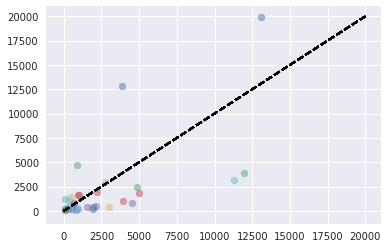

In [14]:
for country in valid_keys:
    plt.scatter(df.loc[country][2017], df_consume.loc[country][2017], alpha=0.5)
    plt.plot([0,20000],[0,20000], '--k')

Load the World Bank population data of each country 

In [15]:
population = pd.read_excel('API_SP.POP.TOTL_DS2_en_excel_v2_10181007.xls',skiprows=3,index_col=0)
population = population.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
population.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
"Yemen, Rep.",5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,5858638.0,5971407.0,6083619.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
South Africa,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,21045785.0,21622590.0,22219897.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
Zambia,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,3676189.0,3791887.0,3912085.0,4038923.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
Zimbabwe,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,4553433.0,4700041.0,4851431.0,5009514.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


Some of the countries may have different spellings or names in the World Bank data, so we want to check it first

In [16]:
for country in valid_keys:
    try:
        #print(str(population.loc[country][str(2017)]))
        population.loc[country][str(2017)]
    except KeyError:
        print(country)

US
Trinidad & Tobago
Venezuela
Iran
Egypt


Check the discrepancies in the spellings

In [17]:
list(population.index)

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Curacao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific'

Rename the country names so that they are consistent.

In [18]:
population = population.rename(index={'United States': 'US', 'Trinidad and Tobago': 'Trinidad & Tobago',
                        'Venezuela, RB':'Venezuela','Iran, Islamic Rep.':'Iran',
                        'Egypt, Arab Rep.':'Egypt'})

Draw scatter plot for 2017 and use the population as the bubble size. 

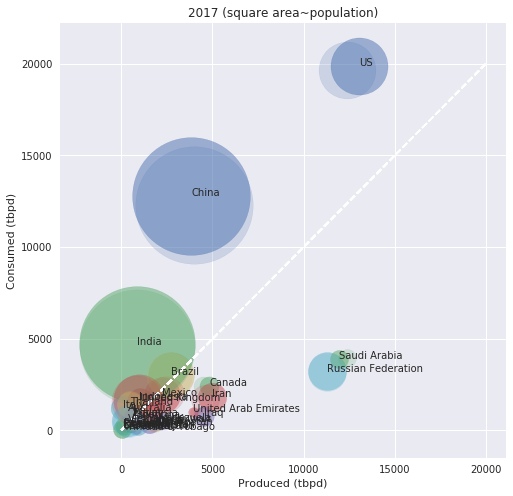

In [19]:
plt.figure(figsize=(8,8))
plt.title('2017 (square area~population)')
plt.xlabel('Produced (tbpd)'), plt.ylabel('Consumed (tbpd)')
for country in valid_keys:
    size = population.loc[country][str(2017)]*0.00001
    plt.scatter(df.loc[country][2017], df_consume.loc[country][2017], alpha=0.5, s=size, marker='o')
    plt.text(df.loc[country][2017], df_consume.loc[country][2017], country)
    plt.plot([0,20000],[0,20000], '--w')
    
for country in valid_keys:
    size = population.loc[country][str(2016)]*0.00001
    plt.scatter(df.loc[country][2016], df_consume.loc[country][2016], alpha=0.2, s=size, marker='o')

Create a folder to store all the figures to be generated.

In [20]:
import os
os.makedirs('./figures')

Define a function to draw the above scatter plot. Then draw and save the plots for for 1987 to 2017.

/home/anuar/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


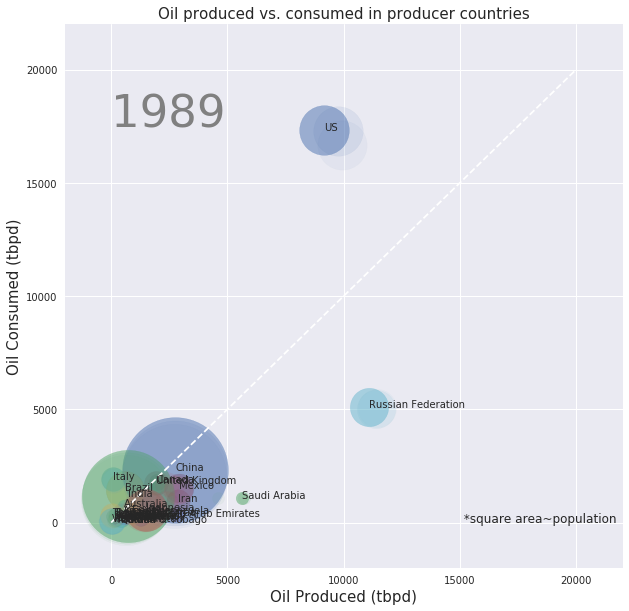

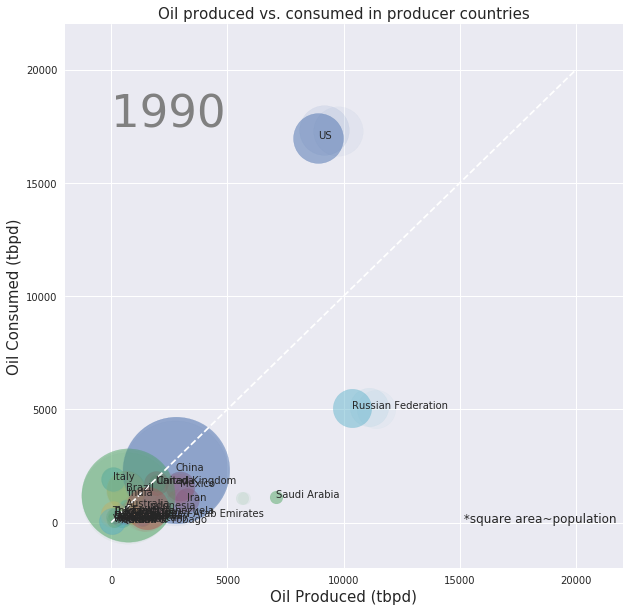

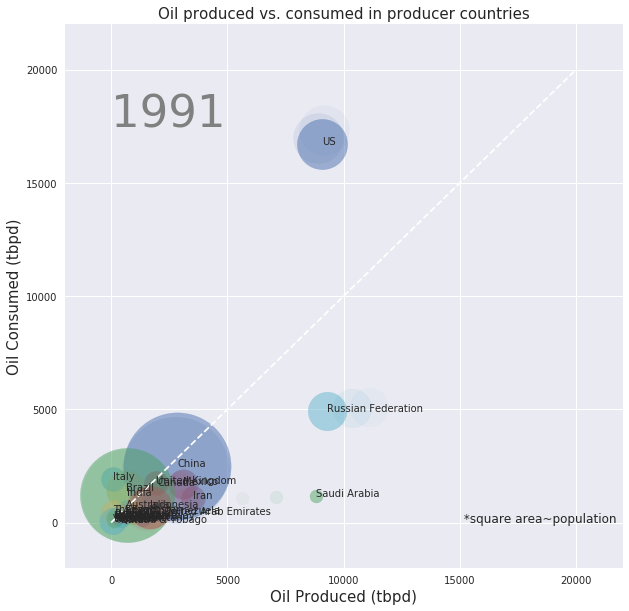

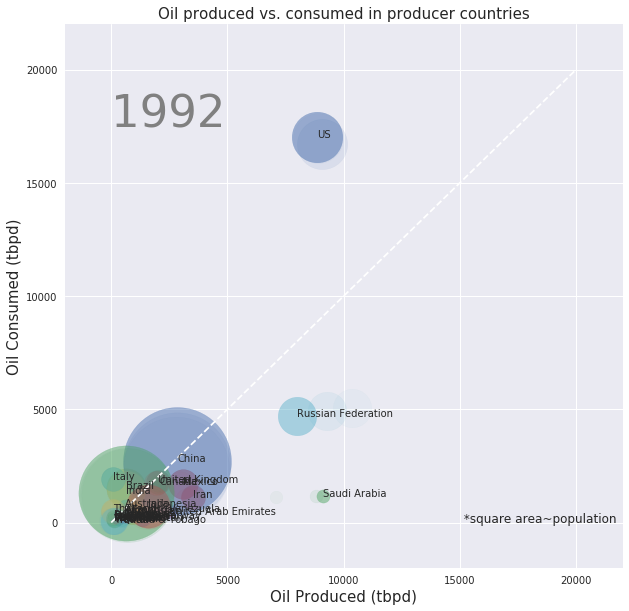

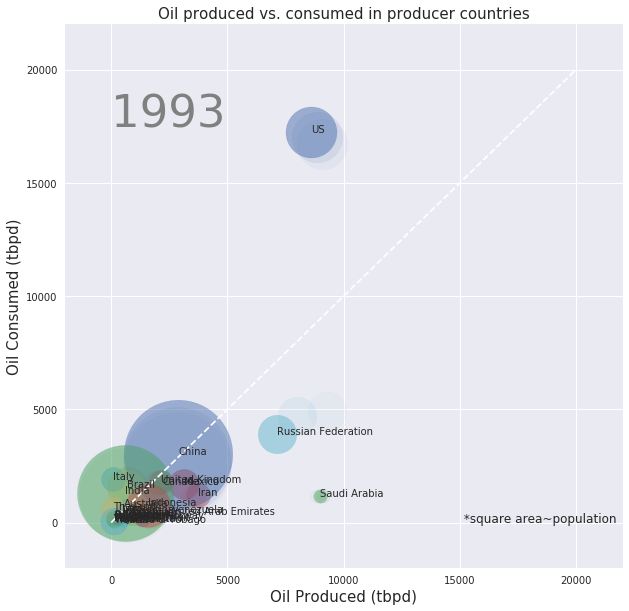

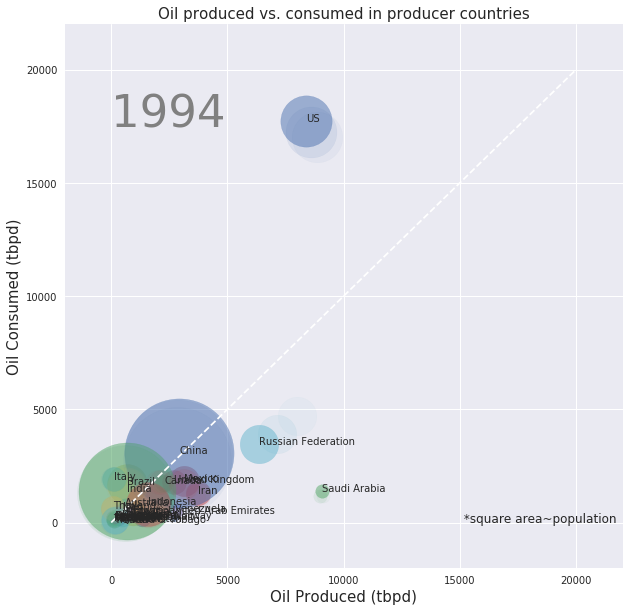

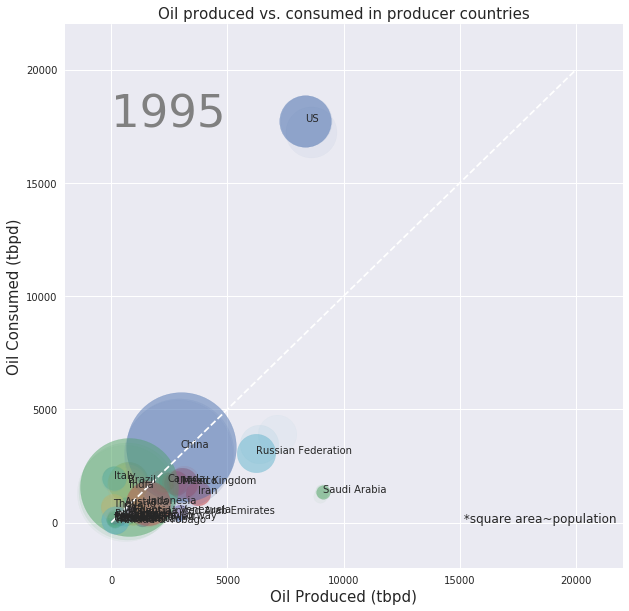

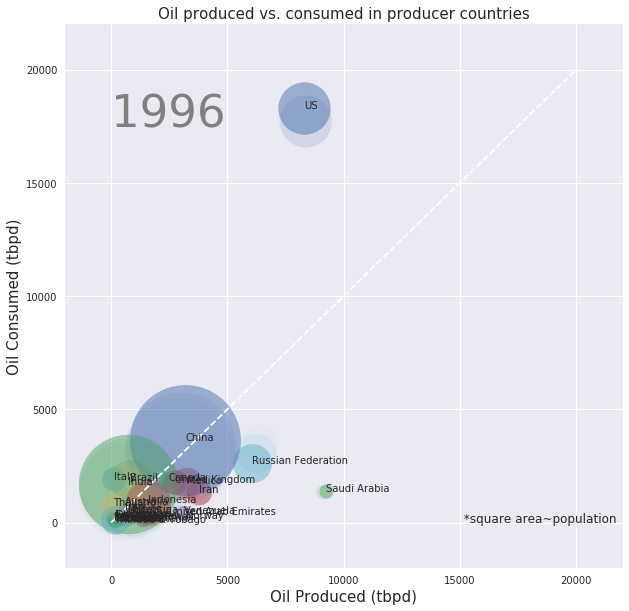

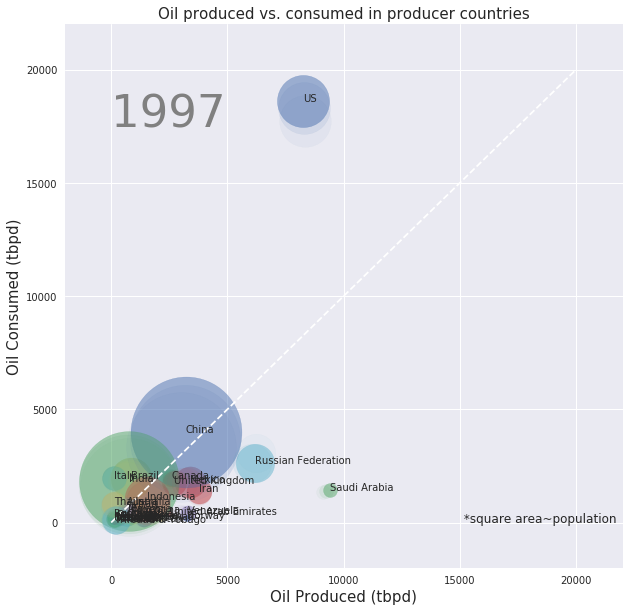

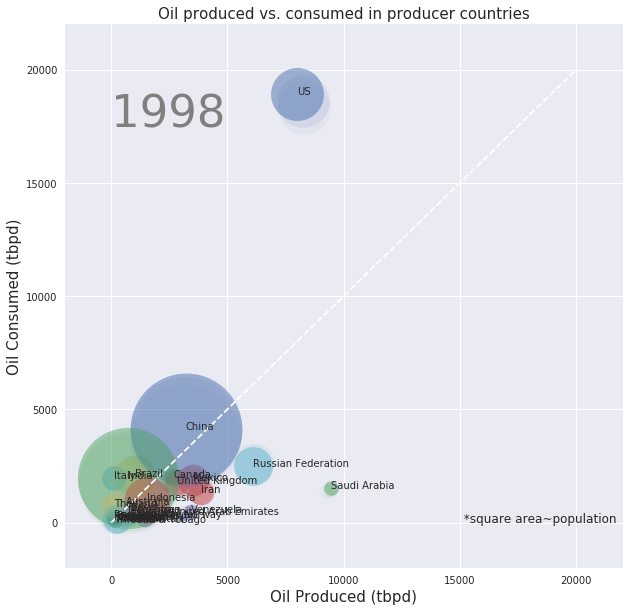

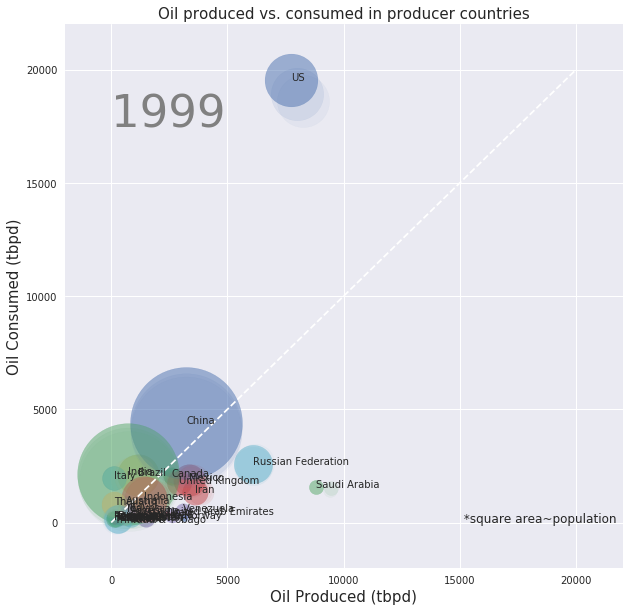

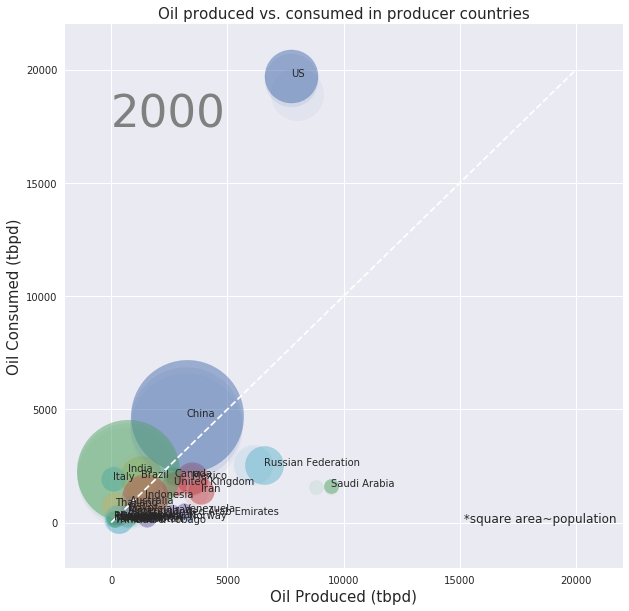

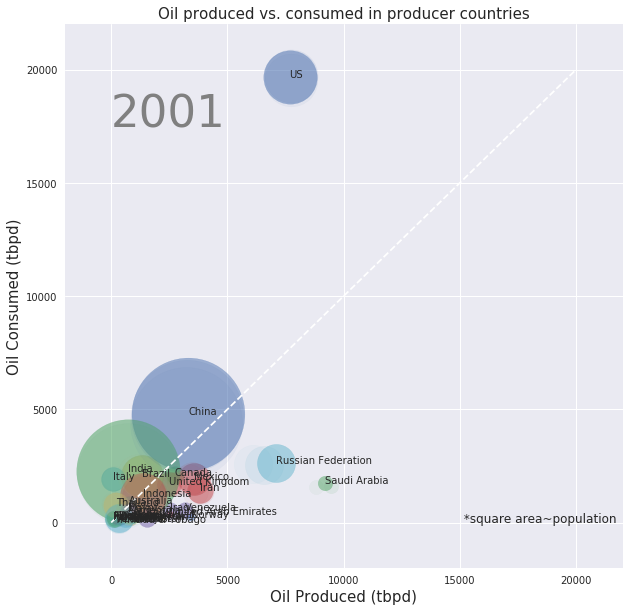

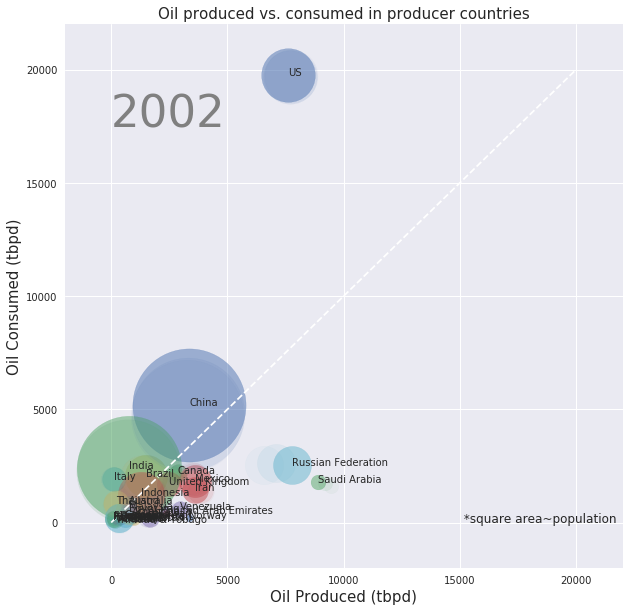

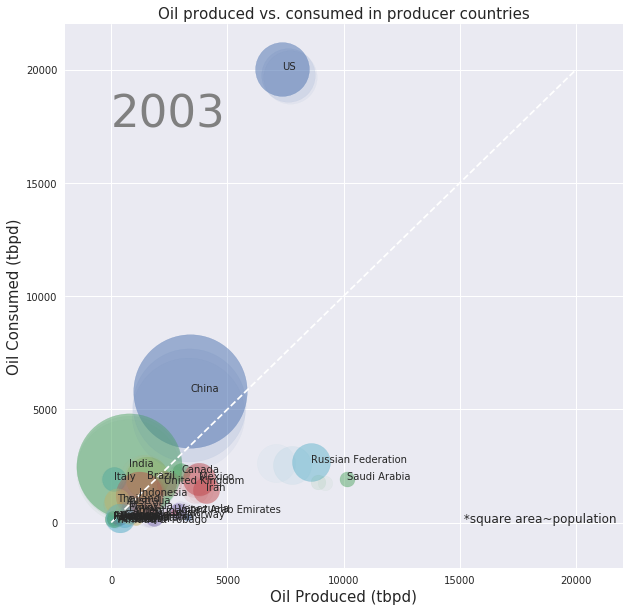

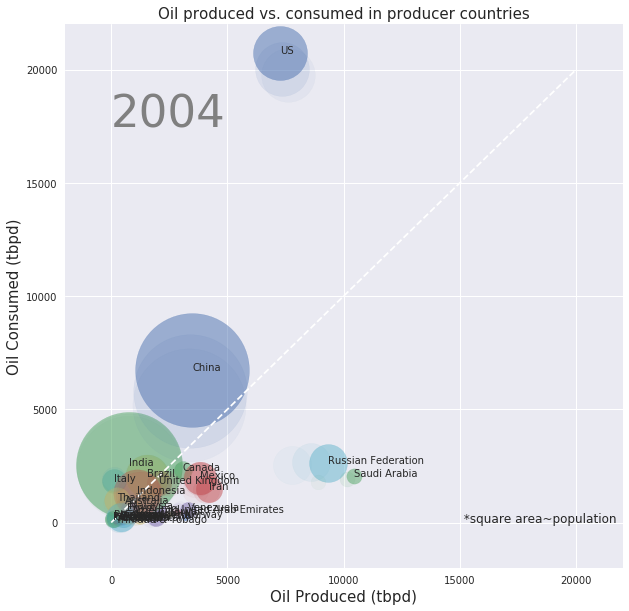

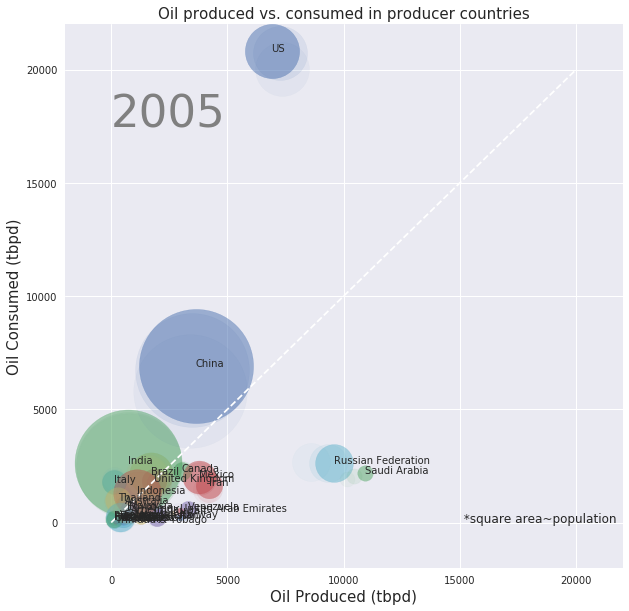

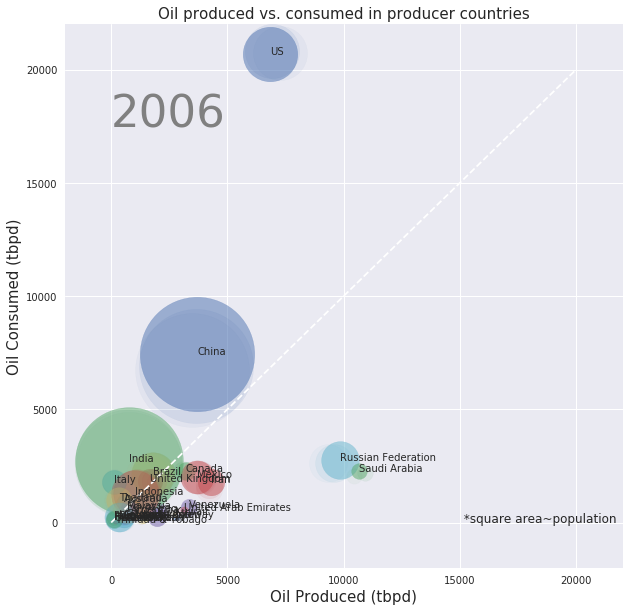

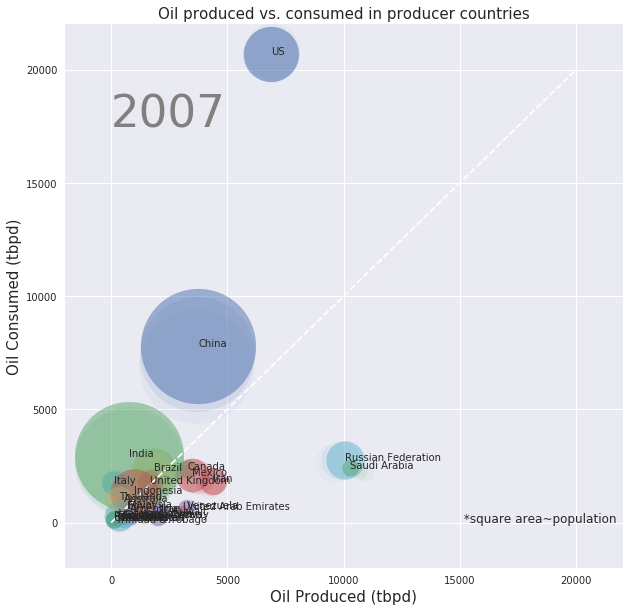

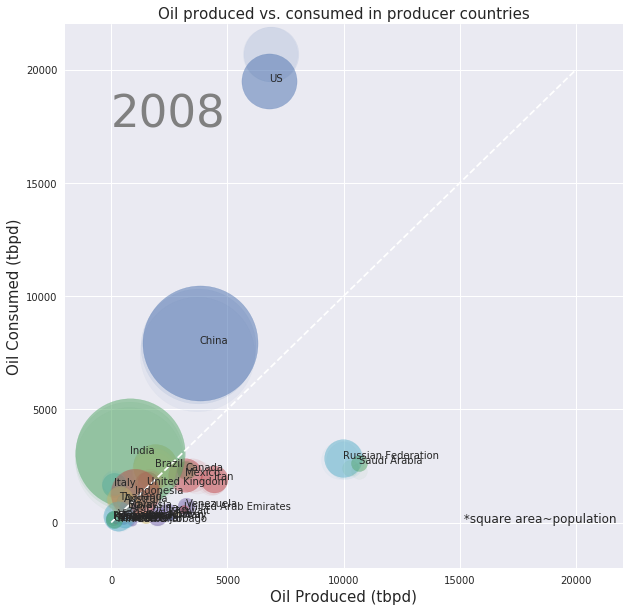

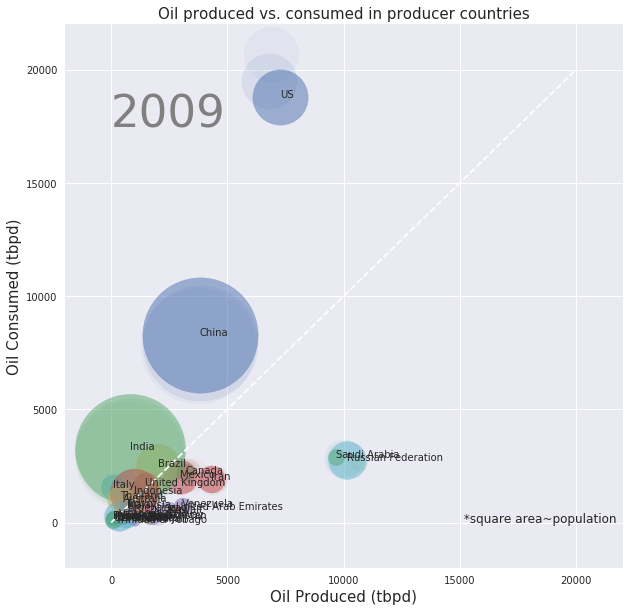

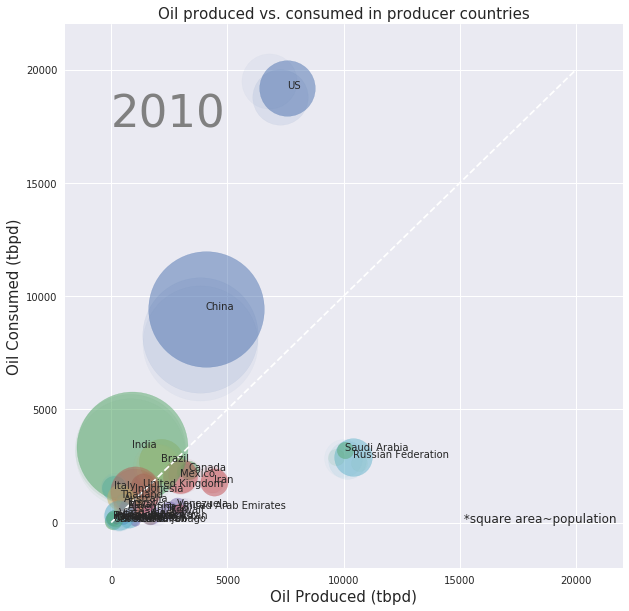

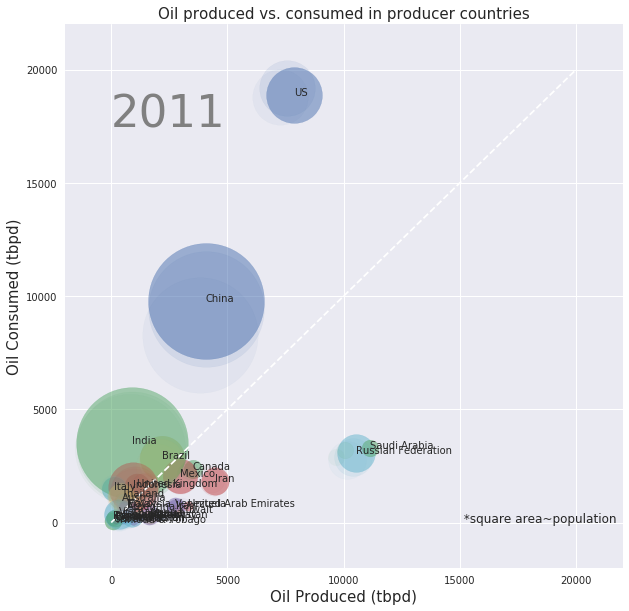

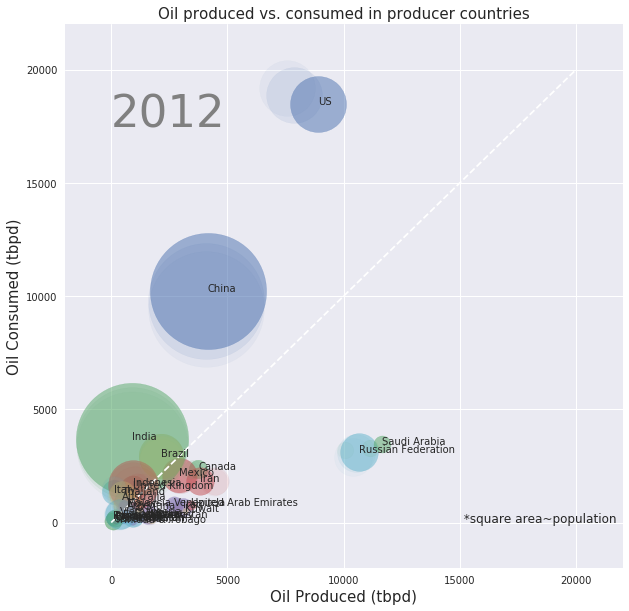

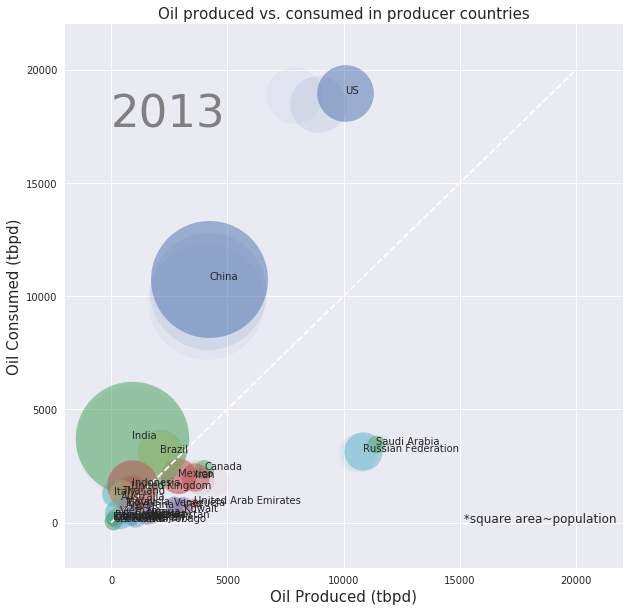

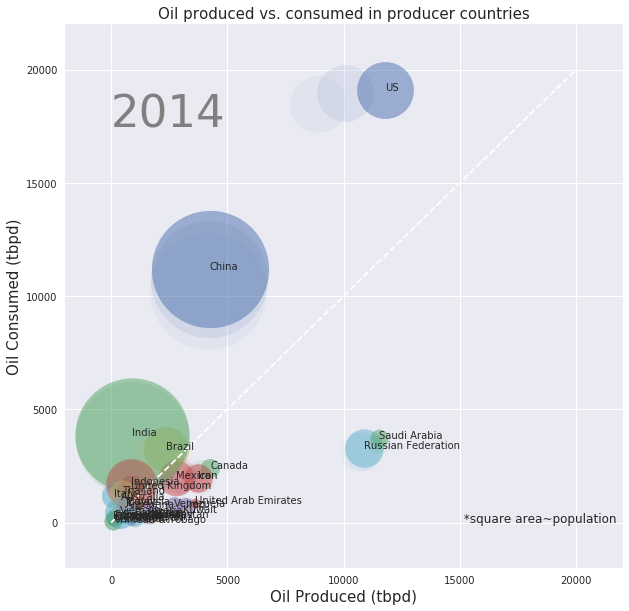

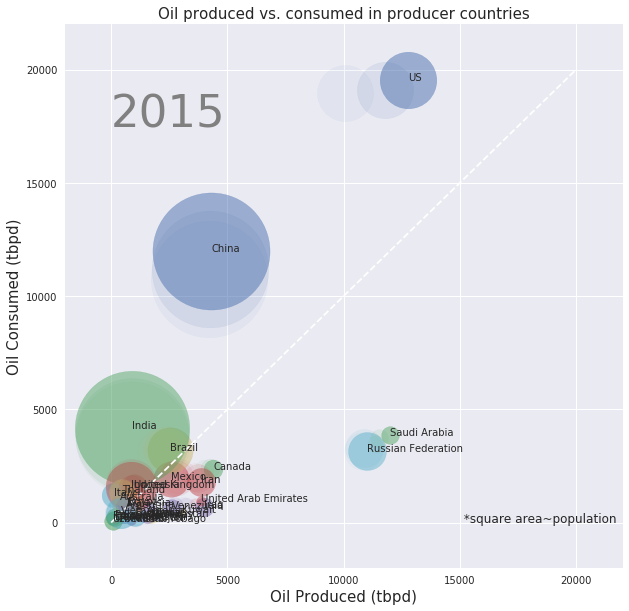

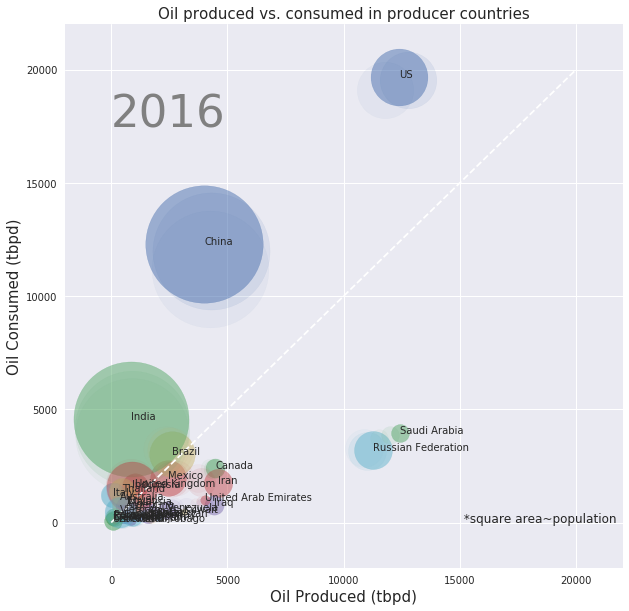

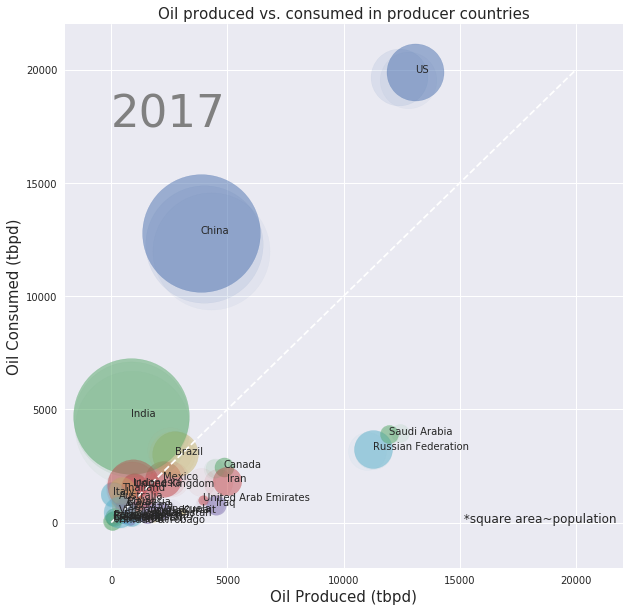

In [21]:
def plot_bubble(year):
    plt.figure(figsize=(10,10))
    plt.xlim(-2000, 22000), plt.ylim(-2000, 22000)
    plt.title('Oil produced vs. consumed in producer countries', fontsize=15)
    plt.xlabel('Oil Produced (tbpd)', fontsize=15), plt.ylabel('Oil Consumed (tbpd)', fontsize=15)           
    plt.plot([0,20000],[0,20000], '--w')
    plt.text(15000,0, ' *square area~population', fontsize=12)
    plt.text(0,17500, str(year), fontsize=45, color='grey')

    for country in valid_keys:
        size = population.loc[country][str(year)]*0.00001
        plt.scatter(df.loc[country][year], df_consume.loc[country][year], alpha=0.5, s=size)
        plt.text(df.loc[country][year], df_consume.loc[country][year], country)
        
    for country in valid_keys:
        size = population.loc[country][str(year-1)]*0.00001
        plt.scatter(df.loc[country][year-1], df_consume.loc[country][year-1], alpha=0.1, s=size)
    
    for country in valid_keys:
        size = population.loc[country][str(year-2)]*0.00001
        plt.scatter(df.loc[country][year-2], df_consume.loc[country][year-2], alpha=0.05, s=size)

for year in range(1989,2018):    
    plot_bubble(year)
    if (year-1987)>9:
        plt.savefig('figures/'+str(year-1987)+'.jpg')
    else:
        plt.savefig('figures/0'+str(year-1987)+'.jpg')

If we have ffmpeg installed, we can create a .gif using the plots from above.

In [22]:
os.chdir('./figures')
os.system('ffmpeg -framerate 60 -f image2 -framerate 1 -i %2d.jpg producer_vs_consumer.gif')

0

Create an interactive plot.

In [23]:
from ipywidgets import interact

def plot_bubble(year=1987):
    plt.figure(figsize=(8,8))
    plt.xlim(-2000, 22000), plt.ylim(-2000, 22000)
    plt.title('Oil produced vs. consumed in producer countries \n'+str(year), fontsize=15)
    plt.xlabel('Oil Produced (tbpd)', fontsize=15), plt.ylabel('Oil Consumed (tbpd)', fontsize=15)           
    plt.plot([0,20000],[0,20000], '--w')
    plt.text(15000,0, ' (bubble size~\n2017 population)', fontsize=10)

    for country in valid_keys:
        size = population.loc[country][str(year)]*0.00001
        plt.scatter(df.loc[country][year], df_consume.loc[country][year], alpha=0.5, s=size, marker='o')
        plt.text(df.loc[country][year], df_consume.loc[country][year], country)
        
interact(plot_bubble, year=(1987,2017,1))
plt.show()

interactive(children=(IntSlider(value=1987, description='year', max=2017, min=1987), Output()), _dom_classes=(…

# WORK IN PROGRESS

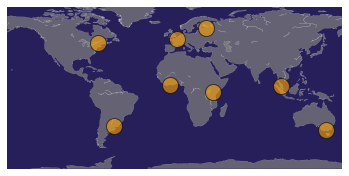

In [24]:
# Hack to fix missing PROJ4 env var
# https://github.com/conda-forge/basemap-feedstock/issues/30#issuecomment-423512069
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

# taken from here https://python-graph-gallery.com/310-basic-map-with-markers/
# libraries
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
 
# Make a data frame with the GPS of a few cities:
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, 101.975766],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, 4.210484],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Malaysia']
})
 
# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#261f59', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data['lat'], data['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)

In [25]:
# check here for long and lat of countries https://developers.google.com/public-data/docs/canonical/countries_csv